# <u><center> IMDb EXPLORATORY DATA ANALYSIS </center></u>

# Introduction
### What is IMDb ???

**[IMDb](https://m.imdb.com/)** is the abbreviation of **`Internet Movie Database`**.

It is an online database containing information related to films, television series, home videos, video games, and streaming
content online.

In this project, we are going to perform Exloratory Data Analysis on `IMDb Data` so as to gain insight from it.

The data used in this project in downloaded from [Kaggle](https://www.kaggle.com/datasets), an open source platform containing thousands of datasets, learning materials, competitions and many more interesting stuff about data.

**[Click here](https://www.kaggle.com/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022)** to access the dataset.

My motivation of doing this project is the course [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas).

It has been a very great course which has helped me to gain skills in initial analysis of data and being able to discover patterns, errors, identify relationship between different parts of the data and summarize their main characteristics and relationship between them through normal exploration and different visualizations.

Now, lets get on with the project.

# Project Outline:

>1. ## [Libraries Importation](#lib_import)
>2. ## [Downloading The Dataset](#datadwld)
>3. ## [Data Preparation and Cleaning](#data_pnc)
>4. ## [Exploratory Data Analysis](#eda)
>5. ## [Asking and Answering Questions](#eda)

# <a id='lib_import'>Libraries Importation</a>
Lets import all the Libraries to be used in the project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Functions of the Libraries imported
**`Pandas`**: For Data Manipulation.

**`Numpy`**: For working with arrays.

**`Seaborn`**: For Data Visualization, it integrates nicely with Pandas DataFrames.

**`Matplotlib`**: For plotting.

##### Also, lets add this magic code which disables plots showing up as popup window, on executing it, the plots will display inline instead.

In [2]:
%matplotlib inline

##### Lets ignore any warnings which may be displaying.

Warnings usually make the code appear untidy.

In [296]:
import warnings
warnings.filterwarnings('ignore')

# <a id='datadwld'> Downloading The Dataset </a>

We are now going to download the dataset from [Kaggle](https://www.kaggle.com/datasets).

There are different ways to download the data. You can download the data manually or use code. We will use code.

>##### Steps:
>1. Pass the link which the dataset is found into a variable.
>2. Import `opendatasets` library.
>3. Use the code `opendatasets.download` to download the dataset.

In [4]:
imdb_dataset_url = ('https://www.kaggle.com/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022')

In [8]:
# !pip install opendatasets --upgrade --quiet
import opendatasets as od
od.download(imdb_dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: novatusaggrey
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 50.5k/50.5k [00:00<00:00, 3.45MB/s]

Now, the dataset has been downloaded. Lets check if it is really present.

In [16]:
data_dir = './imdb-dataset-toprated-films-18982022'

In [298]:
import os
os.listdir(data_dir)

['IMDb_Data_final.csv']

# <a id='data_pnc'> Data Preparation and Cleaning </a>
Now, lets create a Pandas `DataFrame` to store and be able to view the data

In [27]:
imdb_data_df = pd.read_csv('IMDb_Data_final.csv')
imdb_data_df

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972
...,...,...,...,...,...,...,...,...
995,Vizontele,"YilmazErdogan,",", YilmazErdogan, DemetAkbag, AltanErkekli, Cem...",8.0,"Comedy,Drama",110min,NaN,2001
996,Sarfarosh,JohnMathewMatthan,"AamirKhan, NaseeruddinShah, SonaliBendre, Muke...",8.1,"Action,Drama,Thriller",174min,A,1999
997,Udaan,VikramadityaMotwane,"RajatBarmecha, RonitRoy, ManjotSingh, RamKapoor",8.1,Drama,134min,UA,2010
998,English Vinglish,GauriShinde,"Sridevi, AdilHussain, MehdiNebbou, PriyaAnand",7.8,"Comedy,Drama,Family",134min,U,2012


We can also view the data randomly by using `sample` function, which is a good approach in case of any bias.

In [264]:
# Lets view 7 sample rows of data
imdb_data_df.sample(7)

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
401,Mary Poppins,RobertStevenson,"JulieAndrews, DickVanDyke, DavidTomlinson, Gly...",7.8,"Comedy,Family,Fantasy",139min,U,1964
615,The Quiet Man,JohnFord,"JohnWayne, ""MaureenOHara,"", BarryFitzgerald, W...",7.7,"Comedy,Drama,Romance",129min,NaN,1952
568,Lola rennt,TomTykwer,"FrankaPotente, MoritzBleibtreu, HerbertKnaup, ...",7.7,"Action,Crime,Thriller",81min,UA,1998
140,The Usual Suspects,BryanSinger,"KevinSpacey, GabrielByrne, ChazzPalminteri, St...",8.5,"Crime,Drama,Mystery",106min,A,1995
18,Star Wars: Episode III - Revenge of the Sith,GeorgeLucas,"HaydenChristensen, NataliePortman, EwanMcGrego...",7.6,"Action,Adventure,Fantasy",140min,U,2005
151,The Sixth Sense,M.NightShyamalan,"BruceWillis, HaleyJoelOsment, ToniCollette, Ol...",8.2,"Drama,Mystery,Thriller",107min,A,1999
31,The Departed,MartinScorsese,"LeonardoDiCaprio, MattDamon, JackNicholson, Ma...",8.5,"Crime,Drama,Thriller",151min,A,2006


In [48]:
imdb_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


From the information above, we can observe the datatypes of elements in each column, and the number of elements with the coresponding datatypes.

#### What columns do we have in our data?

In [49]:
imdb_data_df.columns

Index(['Title', 'Director', 'Stars', 'IMDb-Rating', 'Category', 'Duration',
       'Censor-board-rating', 'ReleaseYear'],
      dtype='object')

##### How many rows are there in the data?

In [50]:
num_rows = imdb_data_df.shape[0]
print('There are {} rows in the data'.format(num_rows))

There are 1000 rows in the data


##### How many columns are there in the data?

In [51]:
num_cols = imdb_data_df.shape[1]
print('There are {} columns in the data'.format(num_cols))

There are 8 columns in the data


In [52]:
# Shape -> Rows and Columns in the data
imdb_data_df.shape

(1000, 8)

##### Are there any null values in our data?

In [53]:
imdb_data_df.isna().any()

Title                  False
Director               False
Stars                  False
IMDb-Rating            False
Category                True
Duration                True
Censor-board-rating     True
ReleaseYear            False
dtype: bool

Seems there are null values in columns `Category`, `Duration` and `Censor-board-rating`

##### What is the total number of null values in each of the columns found with null values

In [54]:
imdb_data_df.isna()[['Category', 'Duration', 'Censor-board-rating']].sum()

Category                 1
Duration                 1
Censor-board-rating    154
dtype: int64

We can observe:
>`Category` has `1` null value

>`Duration` has `1` null value

>`Censor-board-rating` has `154` null values

# <a id='eda'> <center> Exploratry Data Analysis (EDA) and Visualization </center> </a>

# <center> + </center>

# <a id='eda'> <center> Asking and Answering Questions </center> </a>

##### Lets plot a heatmap to see how the null values are distributed

Text(0.5, 1.0, 'A Heatmap Showing the Distribution of Null Values')

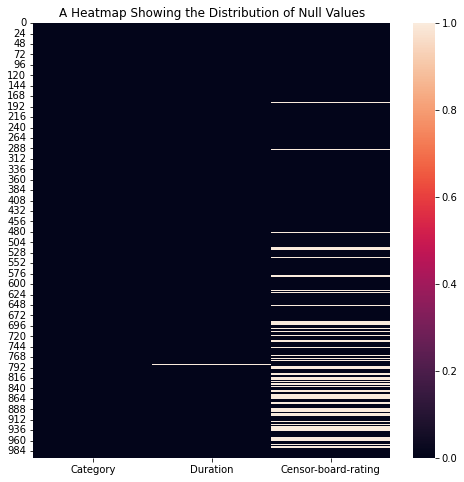

In [299]:
plt.figure(figsize=(8,8))
sns.heatmap(imdb_data_df.isna()[['Category', 'Duration', 'Censor-board-rating']])
plt.title("A Heatmap Showing the Distribution of Null Values")

##### What is the Number of movies released in each year?

In [278]:
num_of_movies_released_df = imdb_data_df.groupby('ReleaseYear')[['Title']].count().copy()
num_of_movies_released_df = num_of_movies_released_df.rename(columns={'Title':'Number_of_Movies'})
num_of_movies_released_df

,Number_of_Movies
ReleaseYear,
1920,1
1921,1
1922,1
1924,1
1925,2
...,...
2018,21
2019,25
2020,8


##### What year had the most number of movies released?

In [290]:
num_of_movies_released_df.max()

Number_of_Movies    33
dtype: int64

In [291]:
num_of_movies_released_df[num_of_movies_released_df['Number_of_Movies'] == 33]

,Number_of_Movies
ReleaseYear,
2004,33


`2004` had the most number of movies released.

##### What year had the least number of movies released?

In [292]:
num_of_movies_released_df.max()

Number_of_Movies    33
dtype: int64

In [294]:
num_of_movies_released_df[num_of_movies_released_df['Number_of_Movies'] == 1]

,Number_of_Movies
ReleaseYear,
1920,1
1921,1
1922,1
1924,1
1926,1
1930,1
1936,1


The years: `1920`, `1921`, `1922`, `1924`, `1926`, `1930`, `1936` had the least number of movies released

#### Lets plot a bar graph Showing the `Distribution of Number Movies Released in Each Year`

Text(0, 0.5, 'Number of Movies')

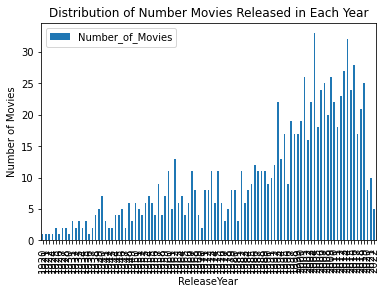

In [263]:
num_of_movies_released_df.plot(kind='bar')
plt.title('Distribution of Number Movies Released in Each Year')
plt.ylabel('Number of Movies')

It Seems from the graph above, the X-Axis display of `ReleaseYears` is not well visible. So lets try using a line graph.

Text(0, 0.5, 'Number of Movies')

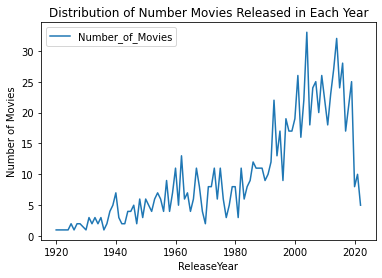

In [255]:
num_of_movies_released_df.plot()
plt.title('Distribution of Number Movies Released in Each Year')
plt.ylabel('Number of Movies')

From the Graph above, we can see 👀 that the period which released a large number of movies is between `2000` and `2020`

##### What does this symbolize?
> This symbolizes that, from `2000` technology had started to take over most of sectors and so being also a motivation to movie actors and directors to produce more movies.

BUT, we can also observe the graph sharply drops nearly before `2020`, we can assume it is around `2019`.

#### 🤔 Why is this?
> This may be due to the `COVID19 PANDEMIC`. Most people had to be in quarantine and so there where few or no movie releases during that period.

In [79]:
imdb_data_df[['Category', 'ReleaseYear', 'Duration']]

,Category,ReleaseYear,Duration
0,"Action,Drama",2022,130min
1,"Action,Adventure,Comedy",2022,139min
2,"Action,Crime,Drama",2022,176min
3,"Action,Adventure,Sci-Fi",1993,127min
4,"Crime,Drama",1972,175min
...,...,...,...
995,"Comedy,Drama",2001,110min
996,"Action,Drama,Thriller",1999,174min
997,Drama,2010,134min
998,"Comedy,Drama,Family",2012,134min


In [18]:
imdb_data_df[imdb_data_df['ReleaseYear'] == 2018]

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
29,Mission: Impossible - Fallout,ChristopherMcQuarrie,"TomCruise, HenryCavill, VingRhames, SimonPegg",7.7,"Action,Adventure,Thriller",147min,U/A,2018
54,Avengers: Infinity War,"AnthonyRusso,",", RobertDowneyJr., ChrisHemsworth, MarkRuffalo...",8.4,"Action,Adventure,Sci-Fi",149min,UA,2018
63,Bohemian Rhapsody,BryanSinger,"RamiMalek, LucyBoynton, GwilymLee, BenHardy",7.9,"Biography,Drama,Music",134min,UA,2018
101,Deadpool 2,DavidLeitch,"RyanReynolds, JoshBrolin, MorenaBaccarin, Juli...",7.7,"Action,Adventure,Comedy",119min,R,2018
102,Spider-Man: Into the Spider-Verse,"BobPersichetti,","RodneyRothman, , ShameikMoore, JakeJohnson, Ha...",8.4,"Animation,Action,Adventure",117min,U,2018
146,K.G.F: Chapter 1,PrashanthNeel,"Yash, SrinidhiShetty, RamachandraRaju, Archana...",8.2,"Action,Crime,Drama",156min,UA,2018
211,Green Book,PeterFarrelly,"ViggoMortensen, MahershalaAli, LindaCardellini...",8.2,"Biography,Comedy,Drama",130min,UA,2018
254,A Star Is Born,BradleyCooper,"LadyGaga, BradleyCooper, SamElliott, GregGrunberg",7.6,"Drama,Music,Romance",136min,A,2018
359,Incredibles 2,BradBird,"CraigT.Nelson, HollyHunter, SarahVowell, HuckM...",7.6,"Animation,Action,Adventure",118min,UA,2018
403,Capharnaüm,NadineLabaki,"ZainAlRafeea, YordanosShiferaw, BoluwatifeTrea...",8.4,Drama,126min,A,2018


We may think of dropping the columns with null values, but we may loose important information since, for the case of `category` and `duration` there is only one null value. And for the case of `Censor-board-rating`, there are plenty of null values but it is still useful.

And if we drop the rows, its the same case that we will have to lose 154 rows of our data just for `Censor-board-rating` column.

##### Lets check the movies categorized as Drama

In [300]:
imdb_data_df[imdb_data_df['Category'] == 'Drama'][['Title', 'Category']]

,Title,Category
10,The Shawshank Redemption,Drama
39,Requiem for a Dream,Drama
44,Fight Club,Drama
118,American Beauty,Drama
129,There Will Be Blood,Drama
...,...,...
947,The Magdalene Sisters,Drama
966,Central do Brasil,Drama
976,Auf der anderen Seite,Drama
983,Black,Drama


##### Lets check the movies categorized as Comedy

In [301]:
imdb_data_df[imdb_data_df['Category'] == 'Comedy'][['Title', 'Category']]

,Title,Category
130,Airplane!,Comedy
150,Superbad,Comedy
159,Office Space,Comedy
163,The Hangover,Comedy
197,Ferris Buellers Day Off,Comedy
364,Young Frankenstein,Comedy
513,Life of Brian,Comedy
593,Clerks,Comedy
709,The Odd Couple,Comedy
874,Bringing Up Baby,Comedy


##### Lets check the movies categorized as Action, Adventure and Comedy

In [302]:
imdb_data_df[imdb_data_df['Category'] == 'Action,Adventure,Comedy'][['Title', 'Director', 'Category']]

,Title,Director,Category
1,Everything Everywhere All at Once,"DanKwan,","Action,Adventure,Comedy"
58,Thor: Ragnarok,TaikaWaititi,"Action,Adventure,Comedy"
62,Deadpool,TimMiller,"Action,Adventure,Comedy"
64,Guardians of the Galaxy,JamesGunn,"Action,Adventure,Comedy"
76,Kingsman: The Secret Service,MatthewVaughn,"Action,Adventure,Comedy"
95,Guardians of the Galaxy Vol. 2,JamesGunn,"Action,Adventure,Comedy"
101,Deadpool 2,DavidLeitch,"Action,Adventure,Comedy"
353,The Blues Brothers,JohnLandis,"Action,Adventure,Comedy"
717,Bajrangi Bhaijaan,KabirKhan,"Action,Adventure,Comedy"
853,The General,"ClydeBruckman,","Action,Adventure,Comedy"


##### Lets check the movies rated below 8

In [244]:
over_8_rating_df = imdb_data_df[imdb_data_df['IMDb-Rating'] < 8][['Title', 'IMDb-Rating', 'ReleaseYear']]
over_8_rating_df

,Title,IMDb-Rating,ReleaseYear
2,The Batman,7.9,2022
12,Titanic,7.9,1997
13,Harry Potter and the Sorcerers Stone,7.6,2001
14,Once Upon a Time in... Hollywood,7.6,2019
15,The Goonies,7.7,1985
...,...,...,...
985,Hindi Medium,7.8,2017
986,Vicky Donor,7.8,2012
988,Nefes: Vatan Sagolsun,7.9,2009
990,Baby,7.9,2015


(array([ 94.,   0.,   0., 173.,   0.,   0., 144.,   0.,   0., 129.]),
 array([7.6 , 7.63, 7.66, 7.69, 7.72, 7.75, 7.78, 7.81, 7.84, 7.87, 7.9 ]),
 <BarContainer object of 10 artists>)

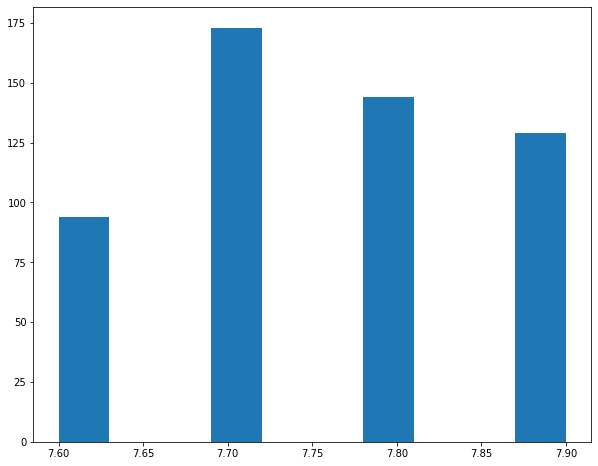

In [252]:
plt.figure(figsize=(10,8))
plt.hist(over_8_rating_df['IMDb-Rating'])

In [246]:
movies_released_after_2018_df = imdb_data_df[imdb_data_df['ReleaseYear'] >= 2018][['Title', 'IMDb-Rating', 'ReleaseYear']]
movies_released_after_2018_df

,Title,IMDb-Rating,ReleaseYear
0,Top Gun: Maverick,8.6,2022
1,Everything Everywhere All at Once,8.3,2022
2,The Batman,7.9,2022
5,Spider-Man: No Way Home,8.3,2021
6,RRR (Rise Roar Revolt),8.1,2022
...,...,...,...
904,Padman,7.9,2018
905,Uri: The Surgical Strike,8.2,2019
906,Chhichhore,8.2,2019
917,Badhaai ho,8.0,2018


#### What is the total number of movies released 2018 or later and with a rating greater than 8?

In [247]:
movies_released_after_2018_df.isin(over_8_rating_df).sum()

Title          29
IMDb-Rating    29
ReleaseYear    29
dtype: int64

##### Lets use `seaborn` to display a `scatterplot` Showing the Release Year and the Level of Rating in each year

Text(0.5, 1.0, 'A Graph of Release Year and level of Rating')

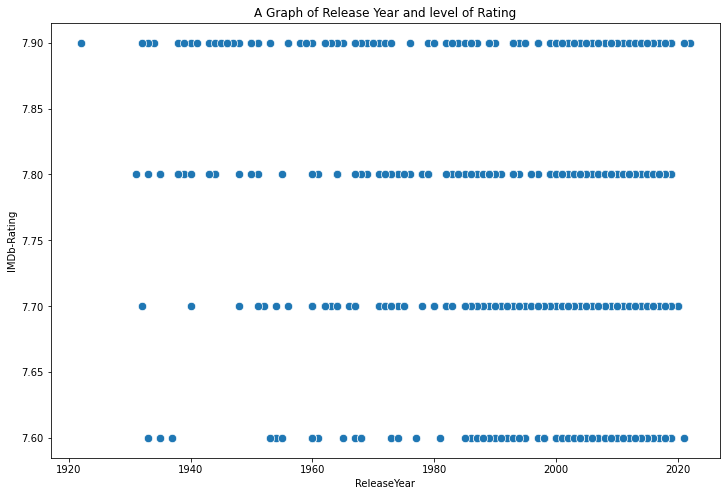

In [262]:
plt.figure(figsize=(12,8))
sns.scatterplot(over_8_rating_df['ReleaseYear'], over_8_rating_df['IMDb-Rating'], s=70)
plt.title('A Graph of Release Year and level of Rating')

(array([ 12.,  32.,  37.,  63.,  66.,  77.,  98., 171., 224., 220.]),
 array([1920. , 1930.2, 1940.4, 1950.6, 1960.8, 1971. , 1981.2, 1991.4,
        2001.6, 2011.8, 2022. ]),
 <BarContainer object of 10 artists>)

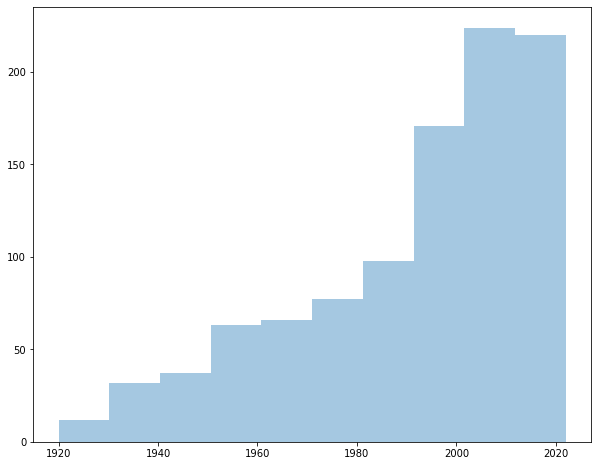

In [251]:
plt.figure(figsize=(10,8))
plt.hist(imdb_data_df.ReleaseYear, alpha=0.4)

#### What is the total number of Directors?

In [102]:
imdb_data_df['Director'].nunique()

572

#### Which movies were released in 2022?

In [104]:
imdb_data_df[imdb_data_df['ReleaseYear'] == 2022][['Title', 'ReleaseYear']]

,Title,ReleaseYear
0,Top Gun: Maverick,2022
1,Everything Everywhere All at Once,2022
2,The Batman,2022
6,RRR (Rise Roar Revolt),2022
32,K.G.F: Chapter 2,2022


#### Which movies were released in 1999?

In [307]:
movies_1999_df = imdb_data_df[imdb_data_df['ReleaseYear'] == 1999][['Title', 'ReleaseYear']]
movies_1999_df

,Title,ReleaseYear
44,Fight Club,1999
77,The Matrix,1999
105,The Green Mile,1999
118,American Beauty,1999
151,The Sixth Sense,1999
159,Office Space,1999
232,Magnolia,1999
288,Toy Story 2,1999
342,The Boondock Saints,1999
474,Being John Malkovich,1999


##### In which categories are the movies arranged?

In [305]:
imdb_data_df[['Category']]

,Category
0,"Action,Drama"
1,"Action,Adventure,Comedy"
2,"Action,Crime,Drama"
3,"Action,Adventure,Sci-Fi"
4,"Crime,Drama"
...,...
995,"Comedy,Drama"
996,"Action,Drama,Thriller"
997,Drama
998,"Comedy,Drama,Family"


##### How many categories of Movies are there in total?

In [59]:
imdb_data_df[['Category']].nunique()

Category    202
dtype: int64

##### How is the distribution of Censor-Board-Ratings in Different Years?

Text(0.5, 1.0, 'Distribution of Censor-Board-Ratings in Different Years')

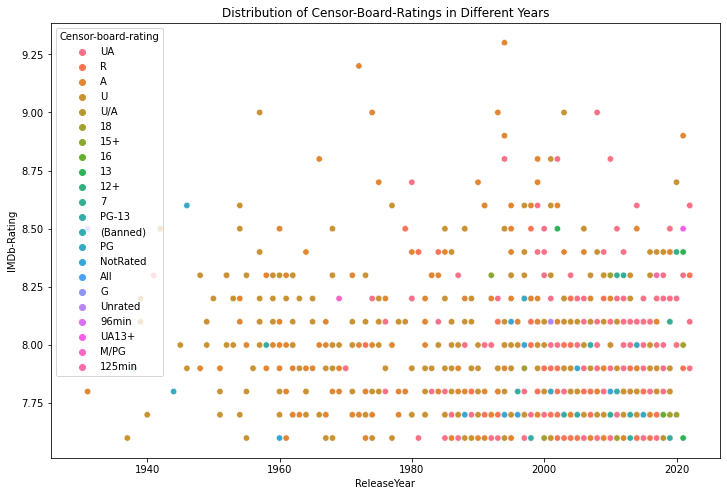

In [261]:
plt.figure(figsize=(12,8))
sns.scatterplot(imdb_data_df['ReleaseYear'],
                imdb_data_df['IMDb-Rating'],
                hue = imdb_data_df['Censor-board-rating'],
                s=40);
plt.title('Distribution of Censor-Board-Ratings in Different Years')

##### What is the range of rating in which most movies awarded?

Text(0.5, 1.0, 'Distribution of Movie Ratings')

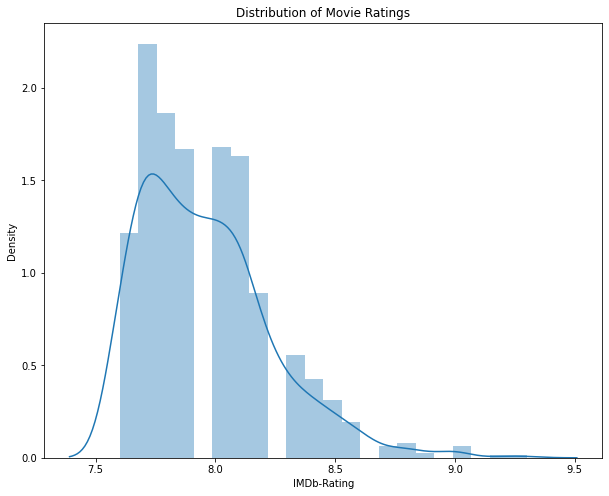

In [239]:
plt.figure(figsize=(10,8))
sns.distplot(imdb_data_df['IMDb-Rating'])
plt.title('Distribution of Movie Ratings')

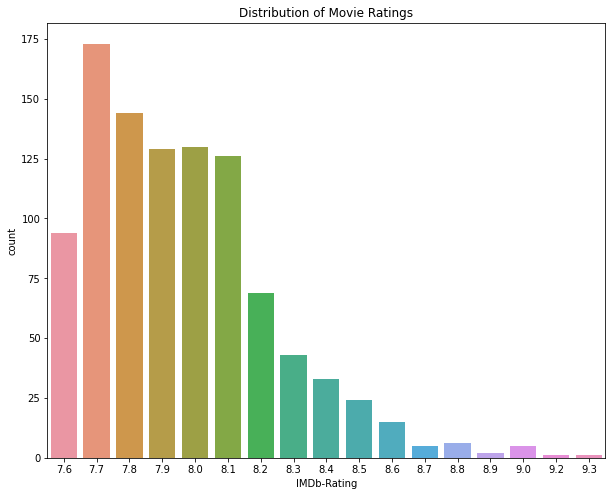

In [238]:
plt.figure(figsize=(10,8))
g = sns.countplot(imdb_data_df['IMDb-Rating']);
plt.title("Distribution of Movie Ratings")
plt.show()

We can observe that most movies ratings are around `7.7 - 8.1`

There are very few movies with a rating of `9 and above`

##### Lets prove:

In [124]:
imdb_data_df[imdb_data_df['IMDb-Rating'] >= 9.0][['Title', 'IMDb-Rating']]

,Title,IMDb-Rating
4,The Godfather,9.2
10,The Shawshank Redemption,9.3
21,The Dark Knight,9.0
47,The Godfather Part II,9.0
51,Schindlers List,9.0
107,12 Angry Men,9.0
112,The Lord of the Rings: The Return of the King,9.0


In [123]:
imdb_data_df[imdb_data_df['IMDb-Rating'] >= 9.0][['Title', 'IMDb-Rating']].count()

Title          7
IMDb-Rating    7
dtype: int64

There are only 7 movies with a rating of `9 and above`

In [225]:
# Movies given a rating of between 7.7 and 8.1
imdb_data_df[(imdb_data_df['IMDb-Rating'] >= 7.7) & (imdb_data_df['IMDb-Rating'] <= 8.1)][['Title', 'IMDb-Rating']]

,Title,IMDb-Rating
2,The Batman,7.9
6,RRR (Rise Roar Revolt),8.1
7,Pirates of the Caribbean: The Curse of the Bla...,8.1
8,Dune: Part One,8.0
12,Titanic,7.9
...,...,...
995,Vizontele,8.0
996,Sarfarosh,8.1
997,Udaan,8.1
998,English Vinglish,7.8


In [226]:
imdb_data_df[(imdb_data_df['IMDb-Rating'] >= 7.7) & (imdb_data_df['IMDb-Rating'] <= 8.1)][['Title', 'IMDb-Rating']].count()

Title          702
IMDb-Rating    702
dtype: int64

There are 702 movies with a rating of between `7.7 and 8.1`

##### How many movies where banned, and in what years?

In [79]:
imdb_data_df[imdb_data_df['Censor-board-rating'] == '(Banned)'][['Title', 'Censor-board-rating', 'ReleaseYear']]

,Title,Censor-board-rating,ReleaseYear
246,The Girl with the Dragon Tattoo,(Banned),2011


Only 1 movie was banned, and it was in 2011

I really enjoy watching `comedy` movies 😂.
##### How are comedy movies rated?

In [136]:
imdb_data_df[imdb_data_df['Category'] == 'Comedy'][['Title', 'IMDb-Rating', 'Category']]

,Title,IMDb-Rating,Category
130,Airplane!,7.7,Comedy
150,Superbad,7.6,Comedy
159,Office Space,7.7,Comedy
163,The Hangover,7.7,Comedy
197,Ferris Buellers Day Off,7.8,Comedy
364,Young Frankenstein,8.0,Comedy
513,Life of Brian,8.0,Comedy
593,Clerks,7.7,Comedy
709,The Odd Couple,7.6,Comedy
874,Bringing Up Baby,7.8,Comedy


##### What is the highest Rating that a movie has been awarded? And which movie is that?

In [316]:
imdb_data_df['IMDb-Rating'].max()

9.3

In [317]:
imdb_data_df[imdb_data_df['IMDb-Rating'] == 9.3][['Title', 'IMDb-Rating']]

,Title,IMDb-Rating
10,The Shawshank Redemption,9.3


The highest rating is `9.3` and the name of the movie is `The Shawshank Redemtion`

##### What is the lowest Rating that a movie has been awarded? And which movie is that?

In [143]:
imdb_data_df['IMDb-Rating'].min()

7.6

In [145]:
imdb_data_df[imdb_data_df['IMDb-Rating'] == 7.6][['Title', 'IMDb-Rating']]

,Title,IMDb-Rating
13,Harry Potter and the Sorcerers Stone,7.6
14,Once Upon a Time in... Hollywood,7.6
16,American Psycho,7.6
18,Star Wars: Episode III - Revenge of the Sith,7.6
26,The Fifth Element,7.6
...,...,...
869,Peeping Tom,7.6
876,Les yeux sans visage,7.6
912,Celda 211,7.6
945,Vera Drake,7.6


The lowest rating is `7.6` and there are 94 movies with that rating.

##### Lets create a text file with the movies listed above

In [178]:
x = imdb_data_df[imdb_data_df['IMDb-Rating'] == 7.6][['Title']]
val = x.values

with open("movies.txt", "w") as output:
    output.write(str(val))

In [295]:
# Lets prove if the text file exists
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Analysis-on-IMDb-Data.ipynb',
 'files',
 'imdb-dataset-toprated-films-18982022',
 'imdb1.jpeg',
 'IMDb_Data_final.csv',
 'movies.txt']

## Summary

What I have learnt from the analysis so far:

1. A period of large number of movie release was between `2000` and `2020`.


2. Slightly before 2020, there was a decline in movie releases, which was likely as a result of `COVID19 Pandemic`.


3. The top rated movie was `The Shawshank Redemtion` with an IMDb-Rating of `9.3`.


4. There was a total of 94 movies which seem to be the least  rated, with an IMDb-Rating of `7.6`


5. Most movies have a rating between `7.7 and 8.1`


6. Comedy movies have a rating ranging from `7.6 to 8.0`


7. In `2011`, one movie named `The Girl with the Dragon Tattoo` was banned


8. There are only `29` movies with a rating greater than `8`


9. `2004` had the most number of movies released.


10. The years: `1920`, `1921`, `1922`, `1924`, `1926`, `1930`, `1936` had the least number of movies released, where as only a `single` movie was released in each of those years.

## Future Work
For a future project, I expect to merge the dataset used in this project with another dataset and gain even more insights through Exploratory Data Analysis.

## References
Below are some of references to resources that I found useful while working on this project:
1. [IMDb Dataset](https://www.kaggle.com/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022)
2. [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)
3. [Stackoverflow](https://stackoverflow.com)
4. [Pandas User Guide Documentation](https://pandas.pydata.org/docs/user_guide/index.html)
5. [Matplotlib User Guide Documentation](https://matplotlib.org/3.3.1/users/index.html)